 The World Happiness Report is a publication of the United Nations Sustainable Development Solutions Network. It contains articles and rankings of national happiness, based on respondent ratings of their own lives, which the report also correlates with various (quality of) life factors.

In this dataset we are going to analyze different factors that affect happiness.

Load the important required libraries.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

import joblib
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('dataset/happiness_score_dataset.csv')

Data Analysis On 2015 World Happiness Dataset

Checking first 5 and last 5 records from the datasets

In [5]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


Let's check the duplicate data in data set.

In [7]:
df.duplicated().sum()

0

There is no duplicate data present in the dataset.

In [8]:
df.shape

(158, 12)

There are total 158 rows/countries and 12 columns/features.

In [9]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [11]:
#Let's check the null values.
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There is no null values in the dataset

# Understand The Dataset

The World Happiness Report is a survey of the state of global happiness. The happiness scores (0-10) are based on answers to the main life evaluation question asked in the poll.

Happiness Score Columns:

GDP per Capita

Family - Social Support

Health Life Expectancy

Freedom

Generosity

Trust (Government Corruption)

Distopya Residual Metric (Dystopia Happiness Score (1.85) + Residual Value

# EDA -  2015 World Happiness Dataset
Top 10 Happiest Countries - 2015

In [12]:
df= df.drop(['Standard Error'], axis = 1)

We have dropped Standard Error column, because that data is unnecessary for us.

In [15]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [16]:
df.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [19]:
df.Region.value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [25]:
#Describing datas
df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# Correlations Between the Data

In [26]:
df.corr()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Economy (GDP per Capita),-0.785267,0.780966,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


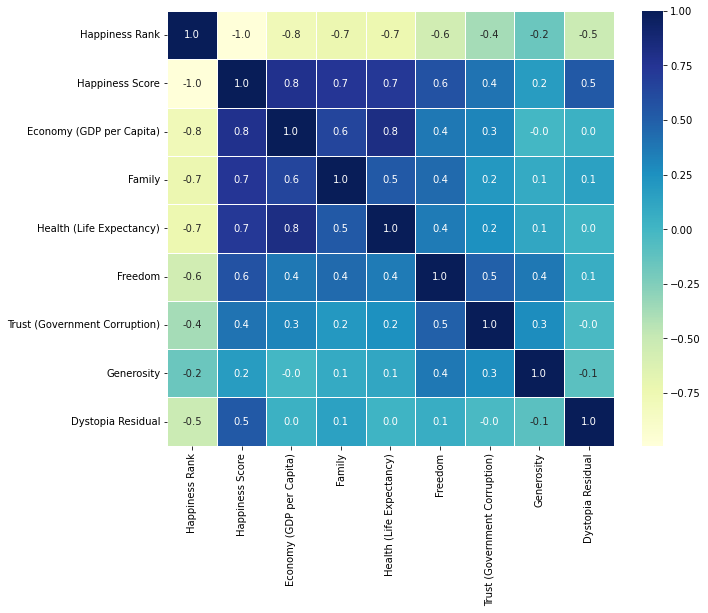

In [30]:
#Correlation Map

list1=["Happiness Rank","Happiness Score","Economy (GDP per Capita)","Family","Health (Life Expectancy)","Freedom","Trust (Government Corruption)","Generosity","Dystopia Residual"]
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(df[list1].corr(), annot=True, cmap="YlGnBu", linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

This is a correlation table for the features of world happiness. We can see that Happiness Rank and Happiness Score are inversely proportional, lower the Happiness Rank, higher will be the Happiness Score, and higher the other seven factors. So let's remove the Happiness Rank and see the correlation of features again.

In [31]:
df_5= df.drop(['Happiness Rank'], axis =1)

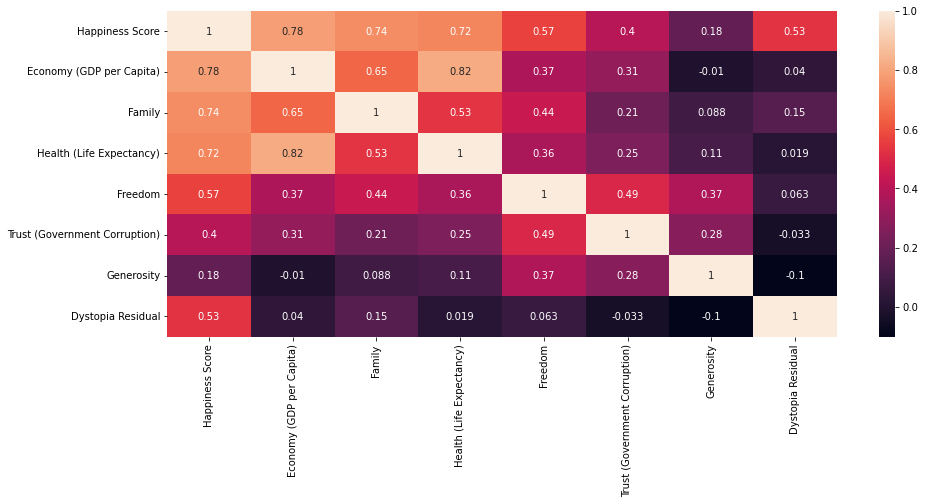

In [36]:
plt.figure(figsize = (15,6))
corr = df_5.corr()
ax = sns.heatmap(
    corr, 
    annot=True  
)

In the above Heat Map we can see that Happiness Score is very highly correlated with Economy, Health, and Family Satisfaction and somewhat related with Freedom also but has very low relation with Trust in Government in average case.

# Correlations for Western Europe

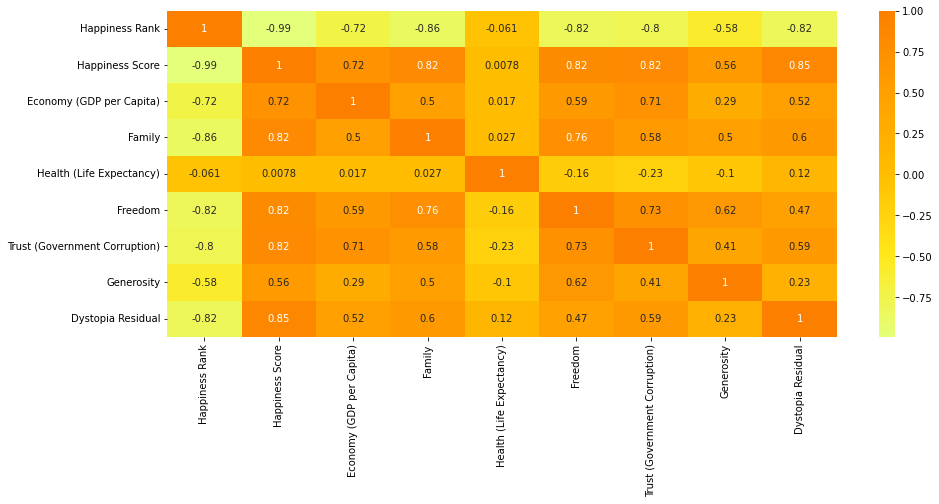

In [38]:
plt.rcParams['figure.figsize'] = (15, 6)
d = df.loc[lambda df: df['Region'] == 'Western Europe']
sns.heatmap(d.corr(), cmap = 'Wistia', annot = True)

plt.show()

The Heat Map particularly for Europe has one more thing to add apart from Family Satisfaction, Freedom, Economy, Generosity, It is also highly correlated with Trust in Government.

The European Region is the Happiest Region so far



# Correlations for Eastern Asia

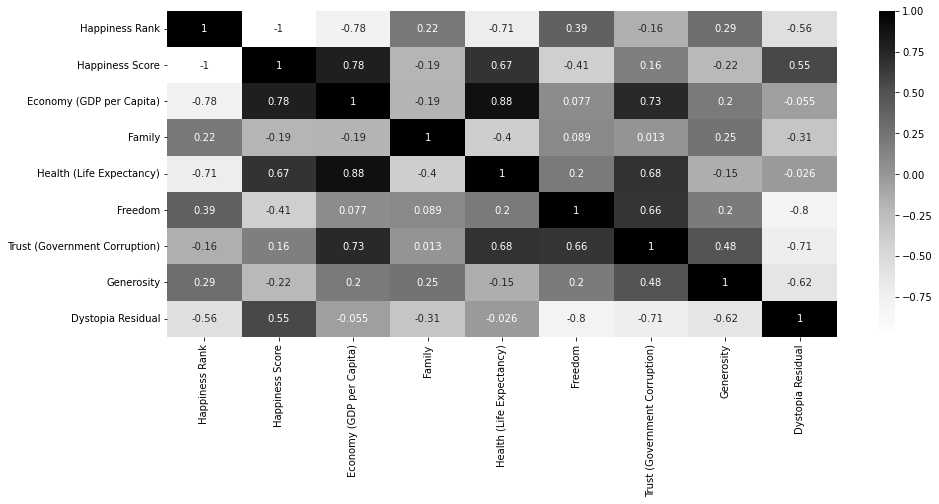

In [44]:
plt.rcParams['figure.figsize'] = (15, 6)
d = df.loc[lambda df: df['Region'] == 'Eastern Asia']
sns.heatmap(d.corr(), cmap = 'Greys', annot = True)

plt.show()

Here, The situation gets worsened as the Correlation is negative for many important factors such as Economy, Health, Trust in Government which makes the situation very critical. It has Positive correlations only with Freedom, Generosity and Family Satisfaction.

# North America

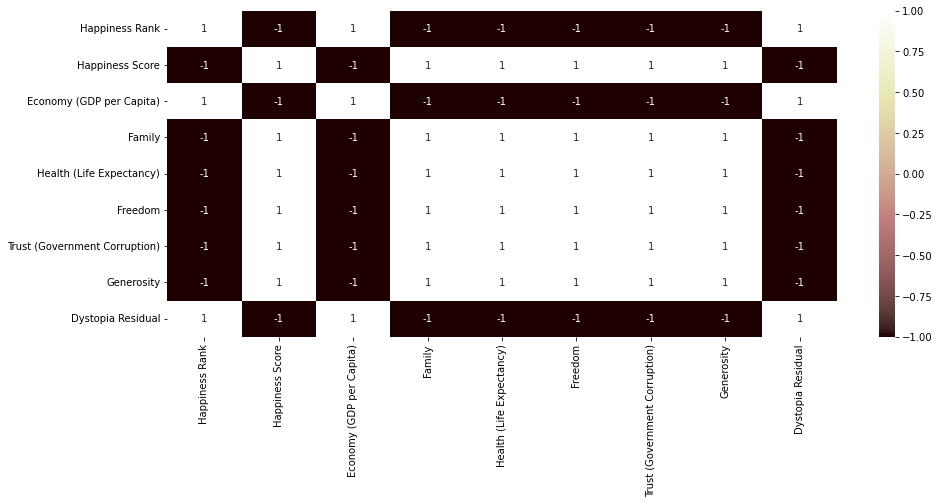

In [50]:
plt.rcParams['figure.figsize'] = (15, 6)
d =df.loc[lambda df: df['Region'] == 'North America']
sns.heatmap(d.corr(), cmap = 'pink', annot = True)

plt.show()

Everything is highly correlated to the Happiness in America. Amongst so many countries of the world. Being a very large country also America is still able to keep their people happy. America stands at position number 10 amongst the Happiness Rankings for the World.

# Middle East and Northern Africa

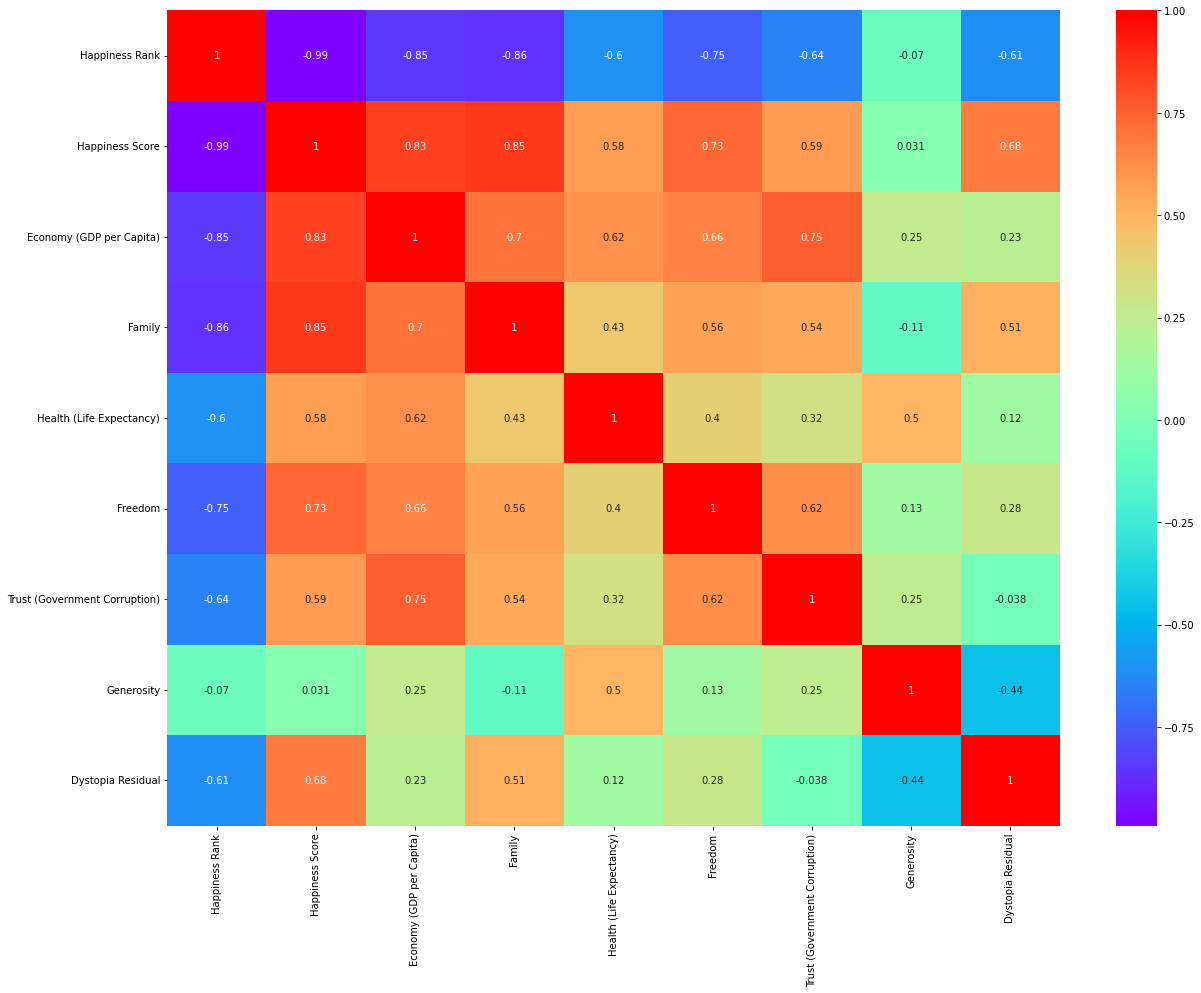

In [51]:
plt.rcParams['figure.figsize'] = (20, 15)
d =df.loc[lambda df: df['Region'] == 'Middle East and Northern Africa']
sns.heatmap(d.corr(), cmap = 'rainbow', annot = True)

plt.show()

The correlations are quite goood with almost all the important factors being highly correlated with Happiness. Family Satisfaction is the most important factor as it is the most important factor for happiness n this region.

# Sub-Saharan Africa

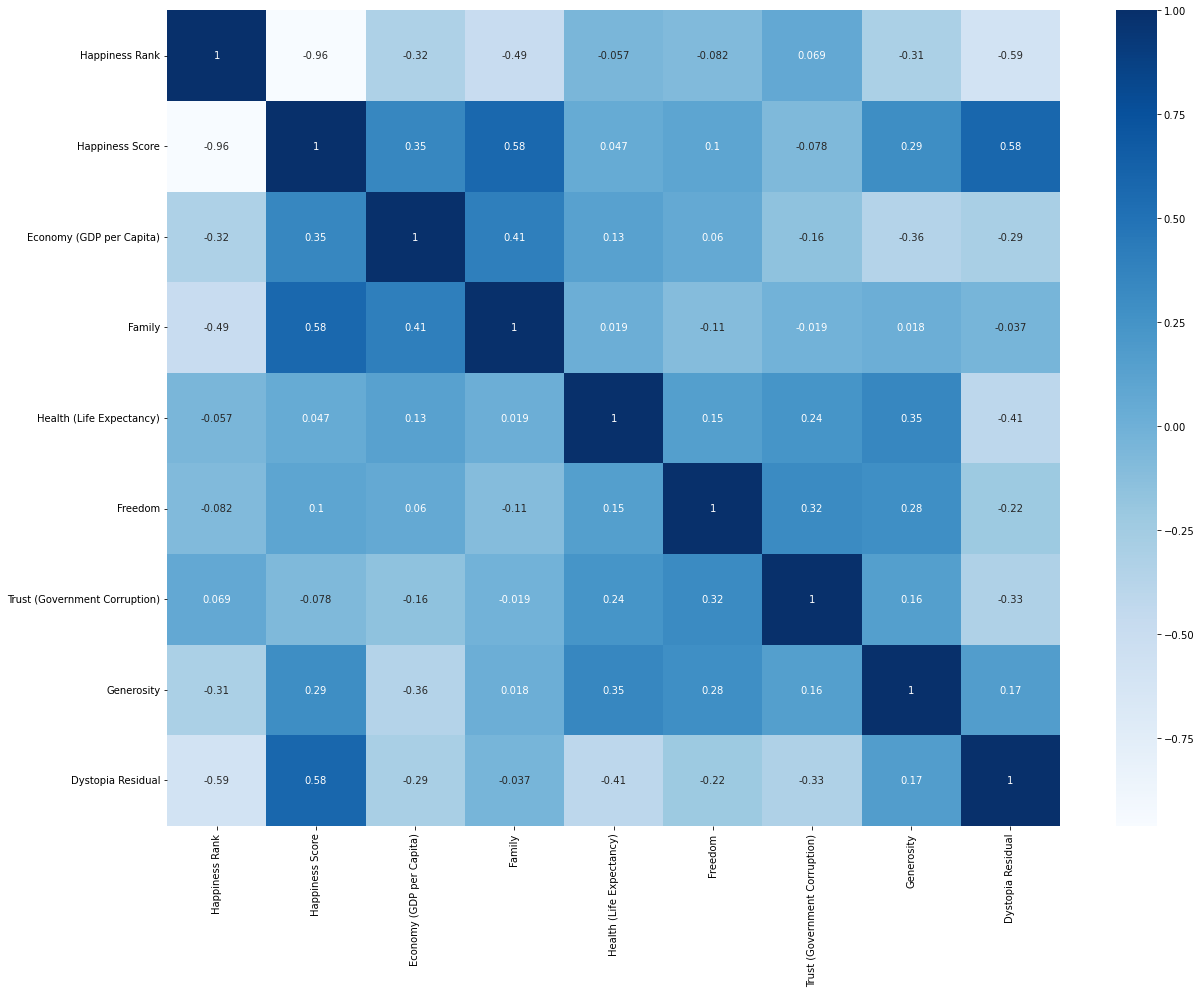

In [52]:
plt.rcParams['figure.figsize'] = (20, 15)
d =df.loc[lambda df: df['Region'] == 'Sub-Saharan Africa']
sns.heatmap(d.corr(), cmap = 'Blues', annot = True)

plt.show()

The Situations are very bad for Sub-Saharan Region as it is the unhappiest region in the world. The correlations with Happiness Score are very low for features such as Generosity, Family Satisfaction, Freedom etc. Almost all of the features are having less than 0.6 correlation which is very bad.

# Let's see the what happen in the Year 2015 in different Regions

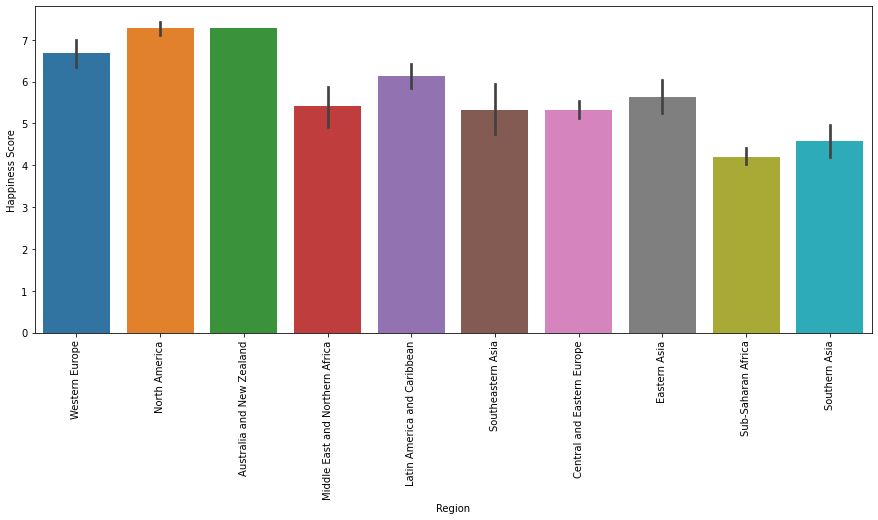

In [54]:
import seaborn as sns
plt.figure(figsize = (15,6))
sns.barplot(x = 'Region',y='Happiness Score',data = df)
plt.xticks(rotation = 90)
plt.show()

North America, Australia and New Zealand have the most Happiness Score, hence they were the most happy region and Sub- Saharan Africa the least happy region in 2015.

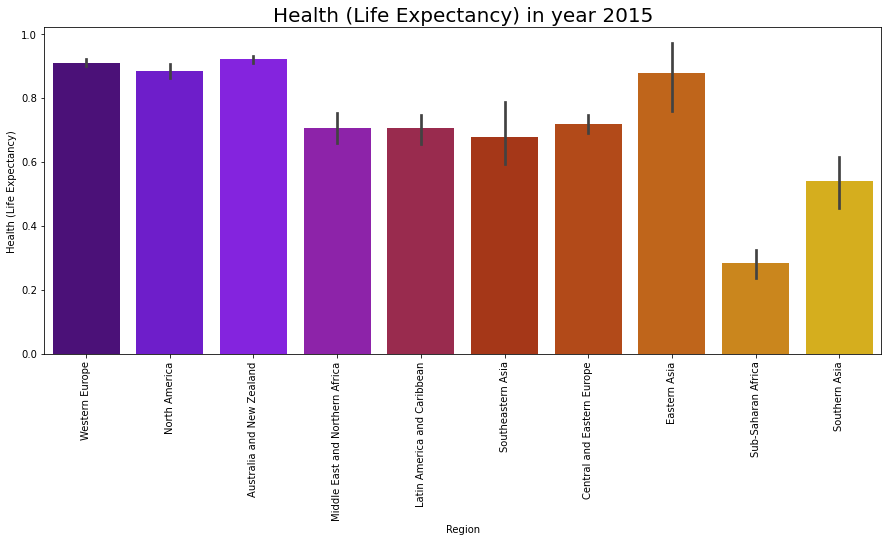

In [55]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Region', y = 'Health (Life Expectancy)', data = df, palette = 'gnuplot')
plt.title('Health (Life Expectancy) in year 2015', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Life Expectancy is least in Sub-Saharan Africa and Southern Asia in 2015

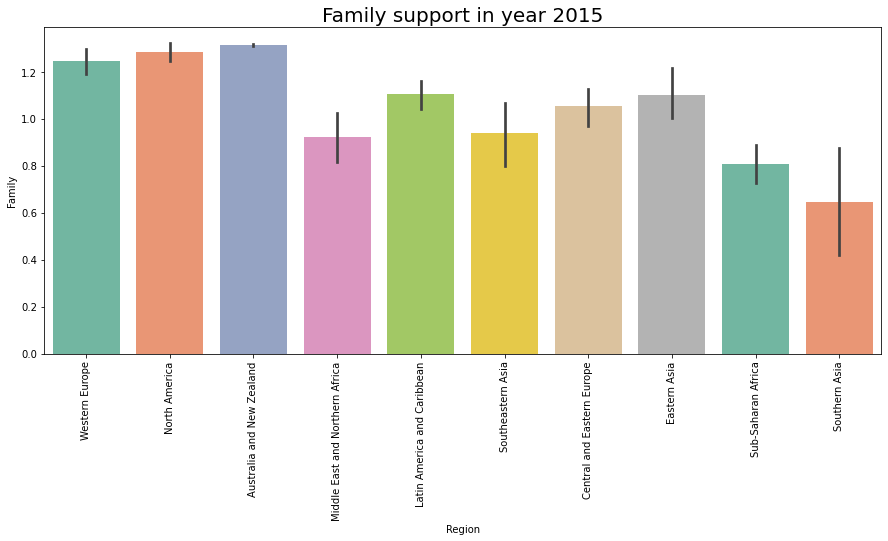

In [56]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Region', y = 'Family', data = df, palette = 'Set2')
plt.title('Family support in year 2015', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Family-Social support are least in Sub-Saharan Africa and Southern Asia in 2015.

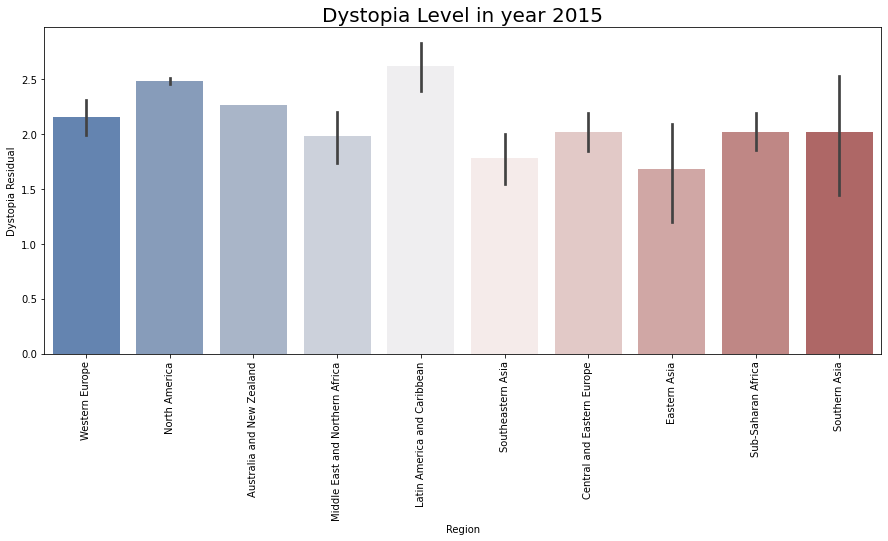

In [57]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Region', y = 'Dystopia Residual', data = df, palette = 'vlag')
plt.xticks(rotation = 90)
plt.title('Dystopia Level in year 2015', fontsize = 20)
plt.show()

Dystopia Level is still most in Latin America and Carribean, regardless of this score this region has good Happiness Score level but an average Life Expectancy Level

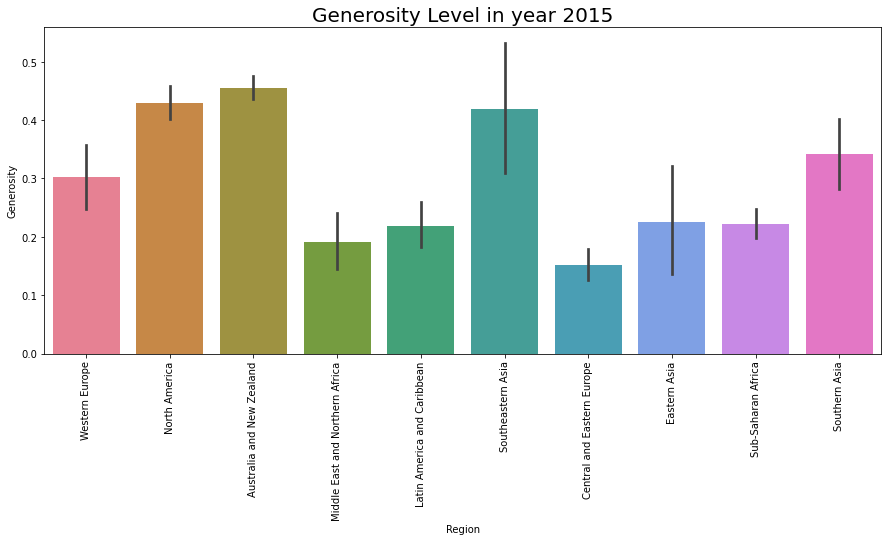

In [58]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Region', y = 'Generosity', data = df, palette = 'husl')
plt.xticks(rotation = 90)
plt.title('Generosity Level in year 2015', fontsize = 20)
plt.show()

Generosity Level is most in Australia and New Zealand, and very low in the Central and Eastern Europe

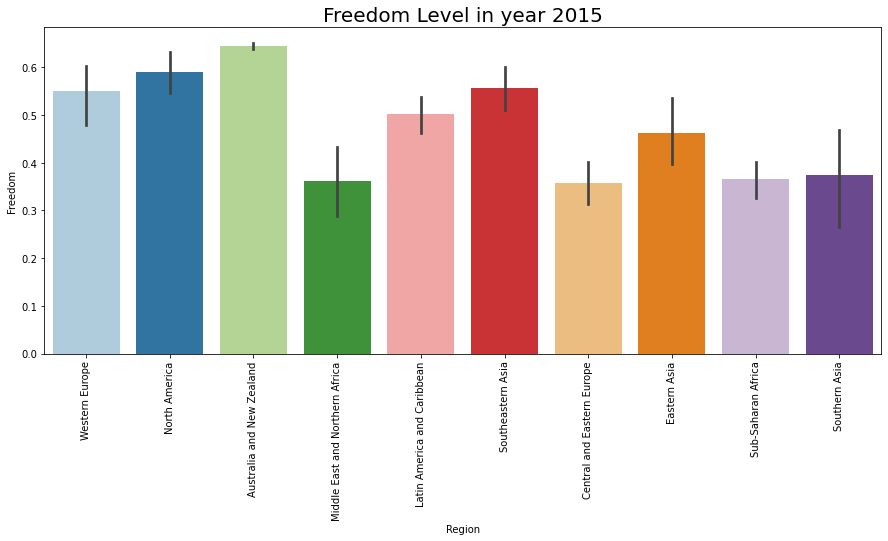

In [59]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Region', y = 'Freedom', data = df, palette = 'Paired')
plt.xticks(rotation = 90)
plt.title('Freedom Level in year 2015', fontsize = 20)
plt.show()

Freedom Level is most in Australia and New Zealand, and low in the Middle East and Northern Africa

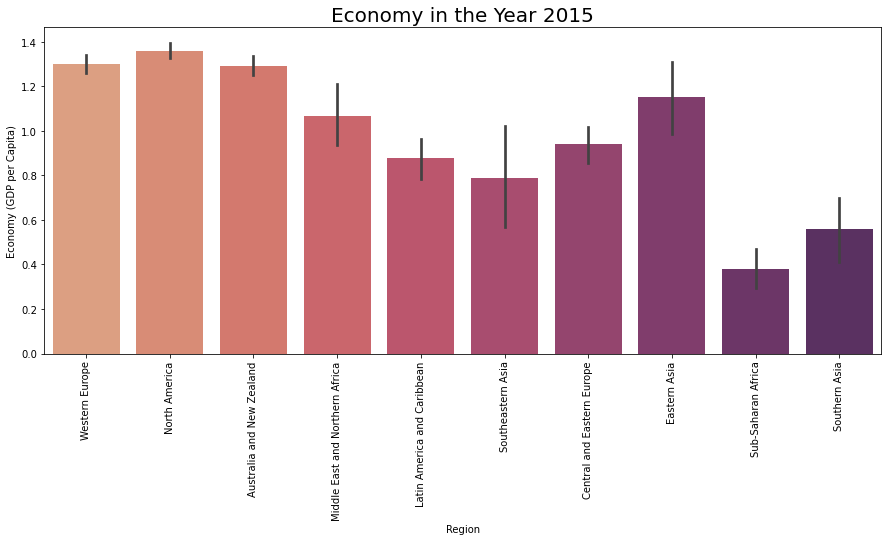

In [60]:
plt.figure(figsize=(15,6))
sns.barplot(x='Region',y='Economy (GDP per Capita)',data=df,palette='flare')
plt.xticks(rotation=90)
plt.title('Economy in the Year 2015',fontsize=20)
plt.show()

Economy of North America is very high while Sub-saharan Africa and Southern Asia is low in Year 2015

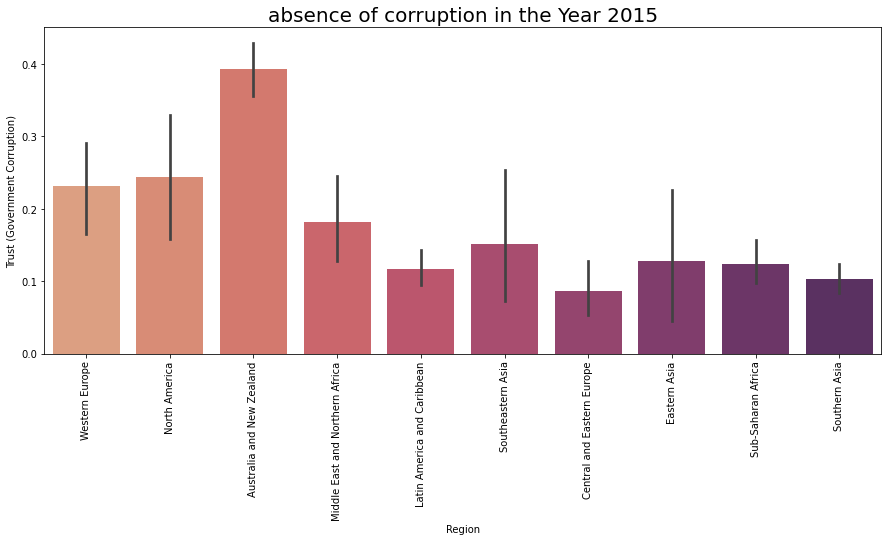

In [61]:
plt.figure(figsize=(15,6))
sns.barplot(x='Region',y='Trust (Government Corruption)',data=df,palette='flare')
plt.xticks(rotation=90)
plt.title('absence of corruption in the Year 2015',fontsize=20)
plt.show()

Absence of corruption is very good in the Austraila and NewZealand Region , while it is very low in Central and Eastern Europe

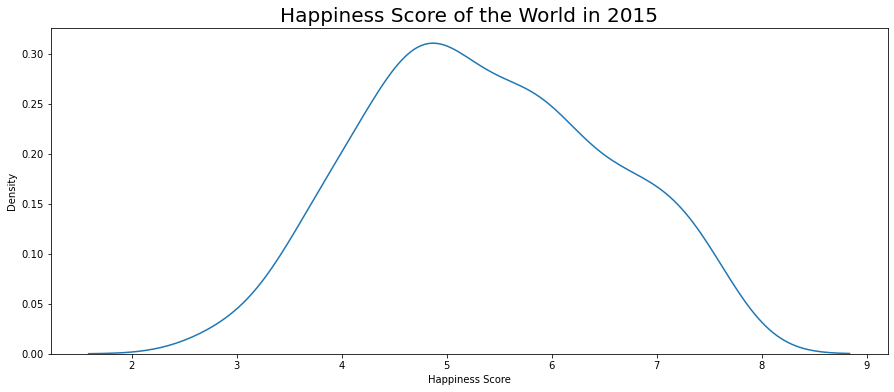

In [62]:
plt.figure(figsize = (15,6))
sns.kdeplot(df['Happiness Score'])
plt.title('Happiness Score of the World in 2015', fontsize = 20)
plt.xlabel('Happiness Score' )
plt.show()

Most countries have the happiness score value of around 5.

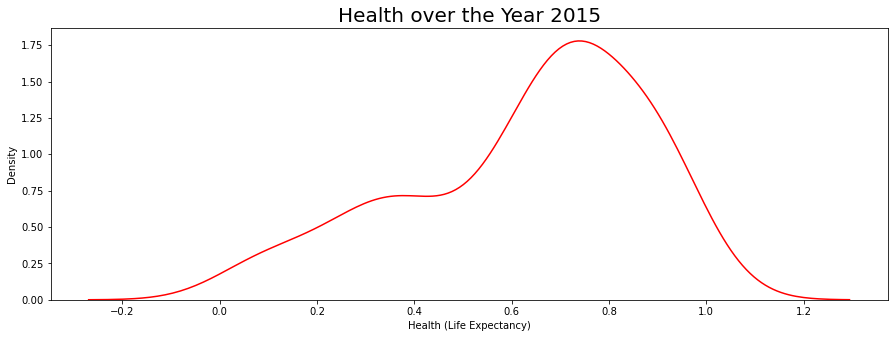

In [63]:
plt.figure(figsize=(15,5))
sns.kdeplot(df_5['Health (Life Expectancy)'],color='red')
plt.title('Health over the Year 2015',size=20)
plt.show()


Most countries have the Health(Life Expectancy) value of from 0.5 to 0.8.

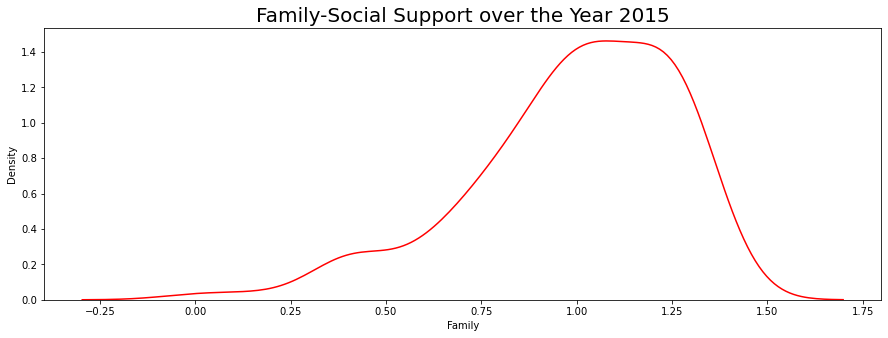

In [64]:
plt.figure(figsize=(15,5))
sns.kdeplot(df_5['Family'],color='red')
plt.title('Family-Social Support over the Year 2015',size=20)
plt.show()

Most countries have the Family-Social support value of from 0.60 to 1.30.

Text(0.5, 1.0, 'Life Expectancy vs Happiness Score in 2015')

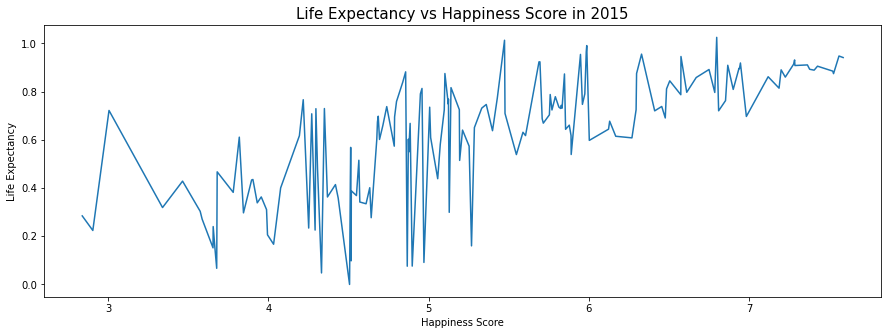

In [65]:
plt.figure(figsize=(15,5))
plt.plot(df['Happiness Score'], df['Health (Life Expectancy)'])
plt.xlabel('Happiness Score')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Happiness Score in 2015', fontsize = 15)

Life Expectancy varies for Happiness Score in range (4.3 to around 5.3). This means that even with an average Happiness Score sometimes Life Expectancy is very low.



# TOP 5 Happy Countries - 2015

In [66]:
df_top5= df.groupby('Country')['Happiness Score'].max().sort_values(ascending=False).head(5).reset_index()
df_top5.columns = ['Country','Score']
df_top5

,Country,Score
0,Switzerland,7.587
1,Iceland,7.561
2,Denmark,7.527
3,Norway,7.522
4,Canada,7.427


(0.0, 8.0)

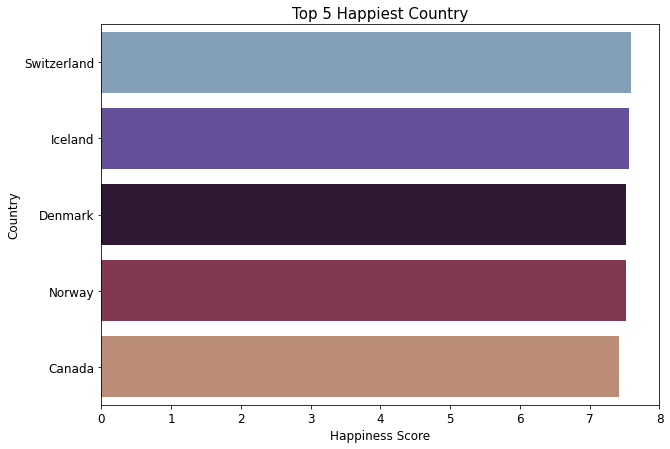

In [67]:
plt.figure(figsize=(10,7))
sns.barplot(y=df_top5['Country'], x=df_top5['Score'], palette='twilight')
plt.title('Top 5 Happiest Country', fontsize=15)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)

Here,with the help of graphical representation the most happiest country is Switzerland.

# TOP 5 Unhappy Countries - 2015

In [68]:
df_bot5= df.groupby('Country')['Happiness Score'].max().sort_values(ascending=False).tail(5).reset_index()
df_bot5.columns = ['Country','Score']
df_bot5

,Country,Score
0,Rwanda,3.465
1,Benin,3.340
2,Syria,3.006
3,Burundi,2.905
4,Togo,2.839


(0.0, 8.0)

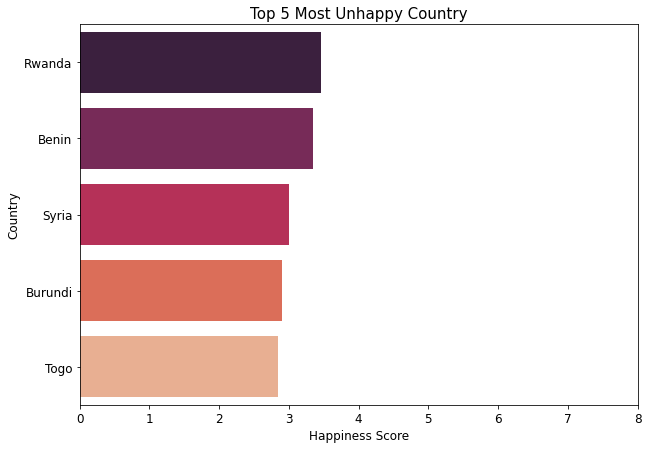

In [69]:
plt.figure(figsize=(10,7))
sns.barplot(y=df_bot5['Country'], x=df_bot5['Score'], palette='rocket', orient='h')
plt.title('Top 5 Most Unhappy Country', fontsize=15)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)

We can see the Togo has the least happiest score.

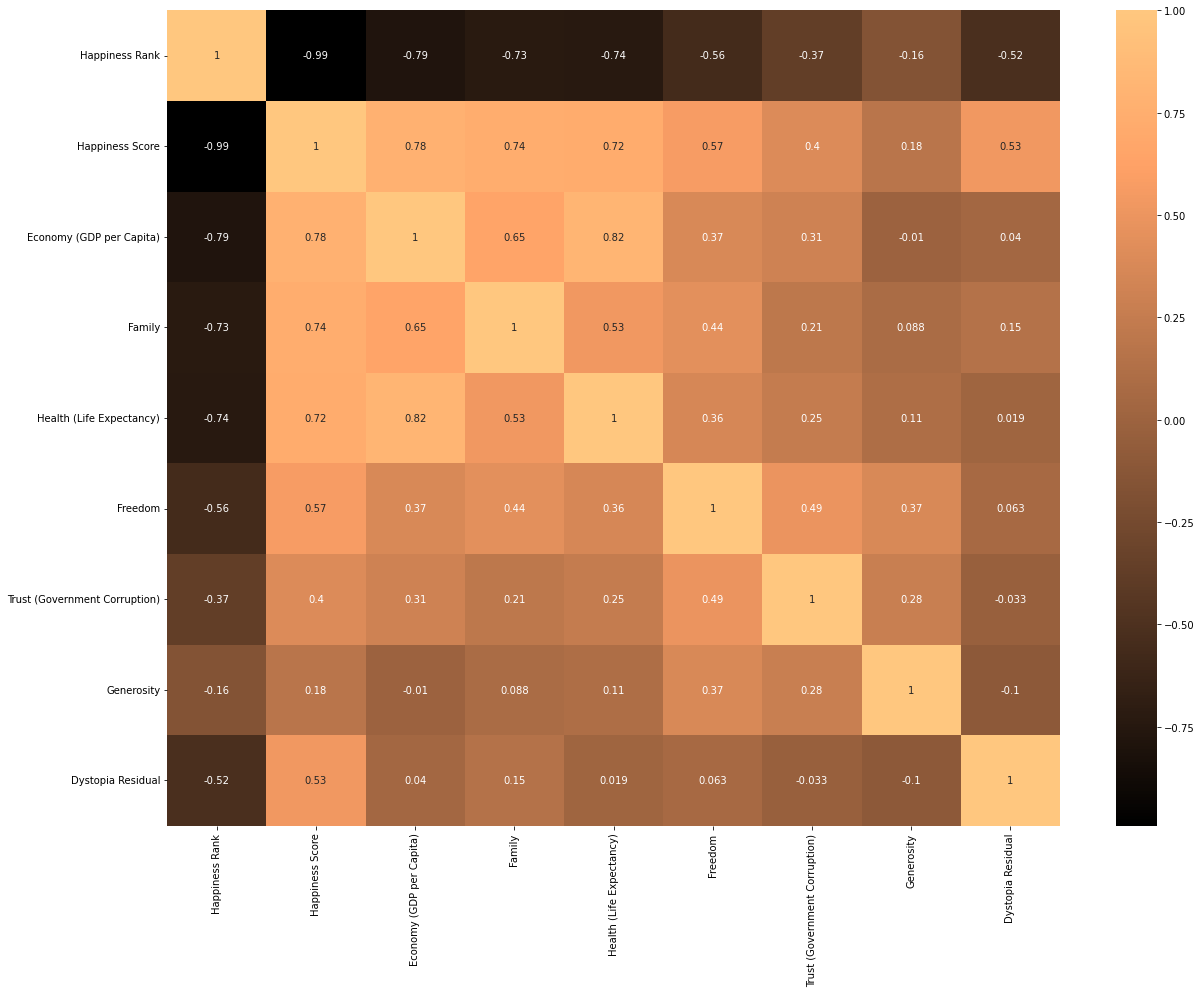

In [70]:
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(df.corr(), cmap = 'copper', annot = True)

plt.show()

# Top 5 Countries with Highest and Lowest GDP Per Capita - 2015

In [71]:
df_gdp_top5 = df.groupby('Country')['Economy (GDP per Capita)'].max().sort_values(ascending=False).head(5).reset_index()
df_gdp_lower5 = df.groupby('Country')['Economy (GDP per Capita)'].max().sort_values(ascending=False).tail(5).reset_index()
new_data = pd.concat([df_gdp_top5,df_gdp_lower5],axis=0)
new_data.columns = ['Country','GDP']
new_data

,Country,GDP
0,Qatar,1.69042
1,Luxembourg,1.56391
2,Kuwait,1.55422
3,Singapore,1.52186
4,Norway,1.45900
0,Liberia,0.07120
1,Niger,0.06940
2,Malawi,0.01604
3,Burundi,0.01530
4,Congo (Kinshasa),0.00000


(0.0, 1.8)

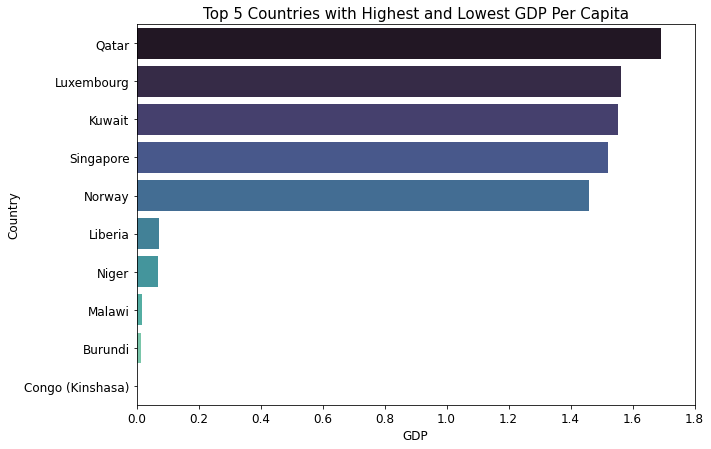

In [72]:
plt.figure(figsize=(10,7))
sns.barplot(y=new_data['Country'], x=new_data['GDP'], palette='mako', orient='h')
plt.title('Top 5 Countries with Highest and Lowest GDP Per Capita', fontsize=15)
plt.xlabel('GDP', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 1.8)

Here Qatar has the Highset Gdp (per Capita) whereas, Congo(kinshasa) has the least Gdp

# Best and Worst 5 Countries With Family-Social Support

In [73]:
df_social_top5 = df.groupby('Country')['Family'].max().sort_values(ascending=False).head(5).reset_index()
df_social_lower5 = df.groupby('Country')['Family'].max().sort_values(ascending=False).tail(5).reset_index()
new_data = pd.concat([df_social_top5,df_social_lower5],axis=0)
new_data.columns = ['Country','Family Support']
new_data

,Country,Family Support
0,Iceland,1.40223
1,Ireland,1.36948
2,Denmark,1.36058
3,Switzerland,1.34951
4,Uzbekistan,1.34043
0,India,0.38174
1,Benin,0.35386
2,Afghanistan,0.30285
3,Togo,0.13995
4,Central African Republic,0.00000


(0.0, 1.5)

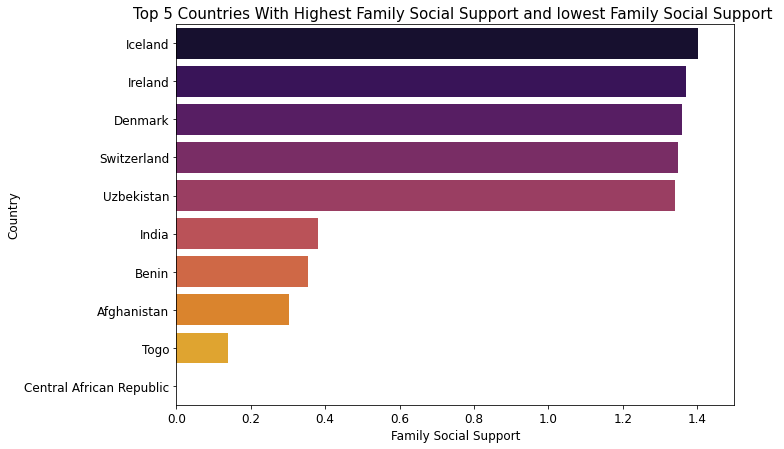

In [74]:
plt.figure(figsize=(10,7))
sns.barplot(y=new_data['Country'], x=new_data['Family Support'], palette='inferno', orient='h')
plt.title('Top 5 Countries With Highest Family Social Support and lowest Family Social Support ', fontsize=15)
plt.xlabel('Family Social Support', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 1.5)

Countries With Highest Family Social Support Is iceland and lowest Family Social Support entral african republic

# The Best and Worst 5 Countries with Health Expectations

In [75]:
df_healthy_top5 = df.groupby('Country')['Health (Life Expectancy)'].max().sort_values(ascending=False).head(5).reset_index()
df_healthy_lower5 = df.groupby('Country')['Health (Life Expectancy)'].max().sort_values(ascending=False).tail(5).reset_index()
new_data = pd.concat([df_healthy_top5,df_healthy_lower5],axis=0)
new_data.columns = ['Country','Health']
new_data

,Country,Health
0,Singapore,1.02525
1,Hong Kong,1.01328
2,Japan,0.99111
3,South Korea,0.96538
4,Spain,0.95562
0,Lesotho,0.07612
1,Swaziland,0.07566
2,Central African Republic,0.06699
3,Botswana,0.04776
4,Sierra Leone,0.00000


(0.0, 1.5)

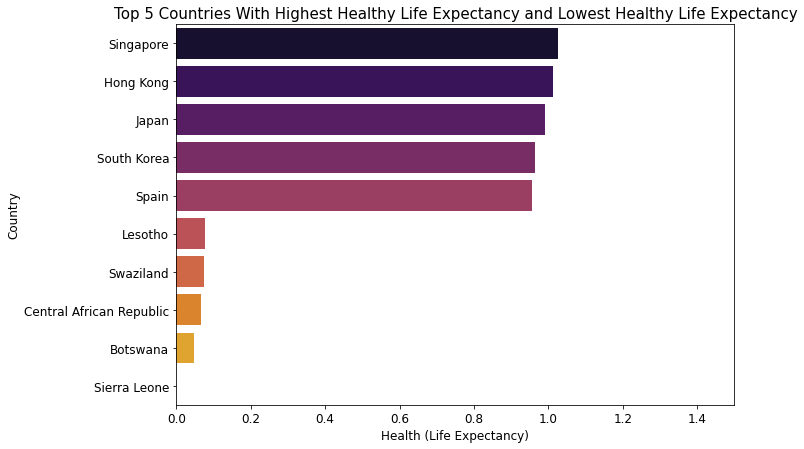

In [76]:
plt.figure(figsize=(10,7))
sns.barplot(y=new_data['Country'], x=new_data['Health'], palette='inferno', orient='h')
plt.title('Top 5 Countries With Highest Healthy Life Expectancy and Lowest Healthy Life Expectancy', fontsize=15)
plt.xlabel('Health (Life Expectancy)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 1.5)

Countries With Highest Healthy Life Expectancy  is Singapore and Lowest Healthy Life Expectancy is sierra leone

# The Best and Worst 5 Countries to Make a Life Choice

In [78]:
df_freedom_top5 = df.groupby('Country')['Freedom'].max().sort_values(ascending=False).head(5).reset_index()
df_freedom_lower5 = df.groupby('Country')['Freedom'].max().sort_values(ascending=False).tail(5).reset_index()
new_data = pd.concat([df_freedom_top5,df_freedom_lower5],axis=0)
new_data.columns = ['Country','Freedom']
new_data

,Country,Freedom
0,Norway,0.66973
1,Switzerland,0.66557
2,Cambodia,0.66246
3,Sweden,0.65980
4,Uzbekistan,0.65821
0,Angola,0.10384
1,Sudan,0.10081
2,Bosnia and Herzegovina,0.09245
3,Greece,0.07699
4,Iraq,0.00000


(0.0, 0.7)

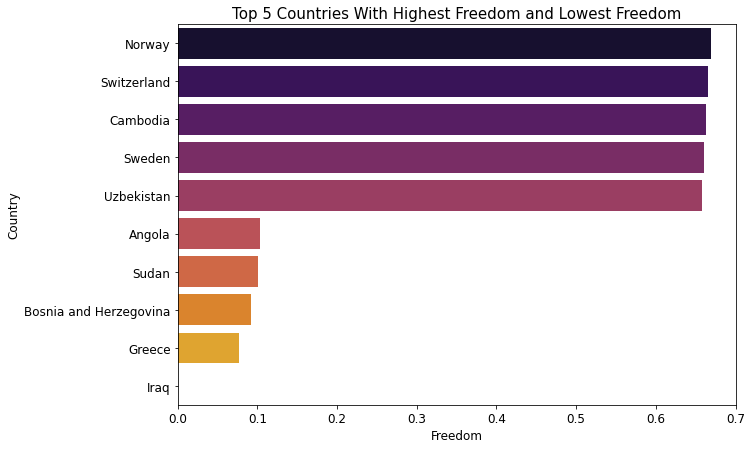

In [79]:
plt.figure(figsize=(10,7))
sns.barplot(y=new_data['Country'], x=new_data['Freedom'], palette='inferno', orient='h')
plt.title('Top 5 Countries With Highest Freedom and Lowest Freedom', fontsize=15)
plt.xlabel('Freedom', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 0.7)

# Top 5 Countries with Highest and Lowest Trust

In [80]:
df_trust_top5 = df.groupby('Country')['Trust (Government Corruption)'].max().sort_values(ascending=False).head(5).reset_index()
df_trust_lower5 = df.groupby('Country')['Trust (Government Corruption)'].max().sort_values(ascending=False).tail(5).reset_index()
new_data = pd.concat([df_trust_top5,df_trust_lower5],axis=0)
new_data.columns = ['Country','Trust']
new_data

,Country,Trust
0,Rwanda,0.55191
1,Qatar,0.52208
2,Singapore,0.49210
3,Denmark,0.48357
4,Sweden,0.43844
0,Lithuania,0.01031
1,Bulgaria,0.00872
2,Romania,0.00649
3,Bosnia and Herzegovina,0.00227
4,Indonesia,0.00000


(0.0, 0.6)

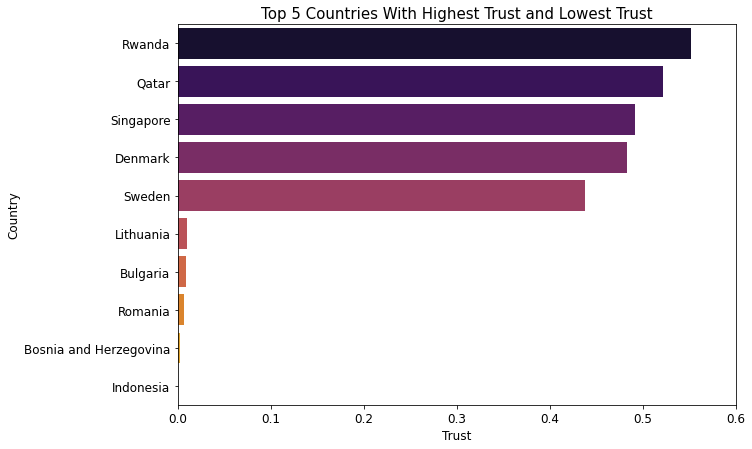

In [81]:
plt.figure(figsize=(10,7))
sns.barplot(y=new_data['Country'], x=new_data['Trust'], palette='inferno', orient='h')
plt.title('Top 5 Countries With Highest Trust and Lowest Trust', fontsize=15)
plt.xlabel('Trust', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 0.6)

# Top 5 Countries With The Highest and Lowest Generosity

In [82]:
df_generosity_top5 = df.groupby('Country')['Generosity'].max().sort_values(ascending=False).head(5).reset_index()
df_generosity_lower5 = df.groupby('Country')['Generosity'].max().sort_values(ascending=False).tail(5).reset_index()
new_data = pd.concat([df_generosity_top5,df_generosity_lower5],axis=0)
new_data.columns = ['Country','Generosity']
new_data

,Country,Generosity
0,Myanmar,0.79588
1,Thailand,0.57630
2,United Kingdom,0.51912
3,Malta,0.51752
4,Indonesia,0.51535
0,Georgia,0.05547
1,Croatia,0.05444
2,Lithuania,0.02641
3,Russia,0.00199
4,Greece,0.00000


(0.0, 0.9)

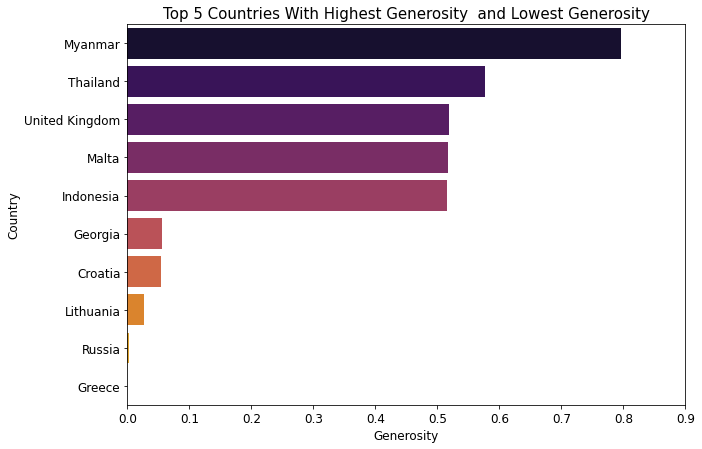

In [83]:
plt.figure(figsize=(10,7))
sns.barplot(y=new_data['Country'], x=new_data['Generosity'], palette='inferno', orient='h')
plt.title('Top 5 Countries With Highest Generosity  and Lowest Generosity', fontsize=15)
plt.xlabel('Generosity', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 0.9)

# Top 5 Countries with Highest and Lowest Dystopia Residue Levels


In [84]:
df_dystopia_residual_top5 = df.groupby('Country')['Dystopia Residual'].max().sort_values(ascending=False).head(5).reset_index()
df_dystopia_residual_lower5 = df.groupby('Country')['Dystopia Residual'].max().sort_values(ascending=False).tail(5).reset_index()
new_data = pd.concat([df_dystopia_residual_top5,df_dystopia_residual_lower5],axis=0)
new_data.columns = ['Country','Dystopia Residual']
new_data

,Country,Dystopia Residual
0,Mexico,3.60214
1,Brazil,3.26001
2,Venezuela,3.19131
3,Costa Rica,3.17728
4,Moldova,3.10712
0,Bulgaria,0.89991
1,Sri Lanka,0.67108
2,Rwanda,0.67042
3,Hong Kong,0.65429
4,Syria,0.32858


(0.0, 3.8)

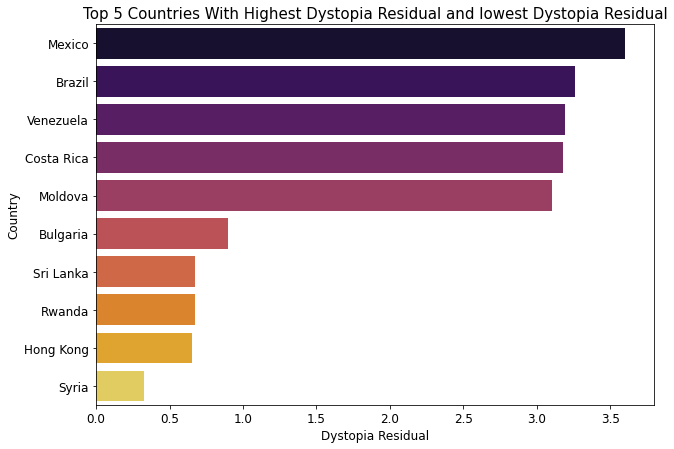

In [87]:
plt.figure(figsize=(10,7))
sns.barplot(y=new_data['Country'], x=new_data['Dystopia Residual'], palette='inferno', orient='h')
plt.title('Top 5 Countries With Highest Dystopia Residual and lowest Dystopia Residual', fontsize=15)
plt.xlabel('Dystopia Residual', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 3.8)

# Let's see what makes the people happy

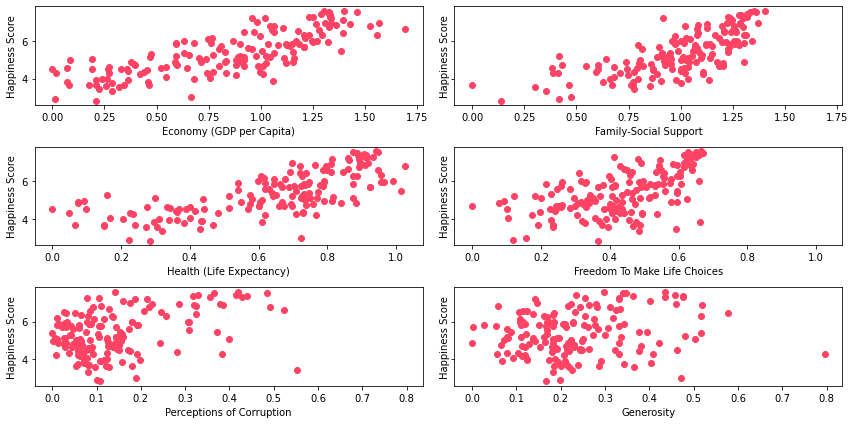

In [88]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 6), sharey='row', sharex='row')

axes[0, 0].scatter(x=df['Economy (GDP per Capita)'], y=df['Happiness Score'], color="#FE4365")
axes[0, 0].set_xlabel('Economy (GDP per Capita)')
axes[0, 0].set_ylabel('Happiness Score')

axes[0, 1].scatter(x=df['Family'], y=df['Happiness Score'], color="#FE4365")
axes[0, 1].set_xlabel('Family-Social Support')
axes[0, 1].set_ylabel('Happiness Score')

axes[1, 0].scatter(x=df['Health (Life Expectancy)'], y=df['Happiness Score'], color="#FE4365")
axes[1, 0].set_xlabel('Health (Life Expectancy)')
axes[1, 0].set_ylabel('Happiness Score')

axes[1, 1].scatter(x=df['Freedom'], y=df['Happiness Score'], color="#FE4365")
axes[1, 1].set_xlabel('Freedom To Make Life Choices')
axes[1, 1].set_ylabel('Happiness Score')

axes[2, 0].scatter(x=df['Trust (Government Corruption)'],y=df['Happiness Score'], color="#FE4365")
axes[2, 0].set_xlabel('Perceptions of Corruption')
axes[2, 0].set_ylabel('Happiness Score')

axes[2, 1].scatter(x=df['Generosity'], y=df['Happiness Score'], color="#FE4365")
axes[2, 1].set_xlabel('Generosity')
axes[2, 1].set_ylabel('Happiness Score')

fig.tight_layout()

# Conclusion - World Happiness Data Set - 2015

From above scatter plot, we can see that, except Perception Of Corruption every other thing like Economy (GDP Per Capita), Family Social Support, Health (Life Expectancy), Freedom To Choose Thing & Generosity makes people happy.

Top Countries In The World By Happiness Factors As:

Happiest Country - Switzerland

Highest GDP Per Capita (Economy) - Qatar

Highest Family Social Supported - Iceland

High Healthy Life Expectancy Country - Singapore

Highest Freedom To Choose Life Country - Norway

Highest Perception of Corruption - Rwanda

Highest Generosity - Myanmar

Also Perception of corruption makes the country people least happy

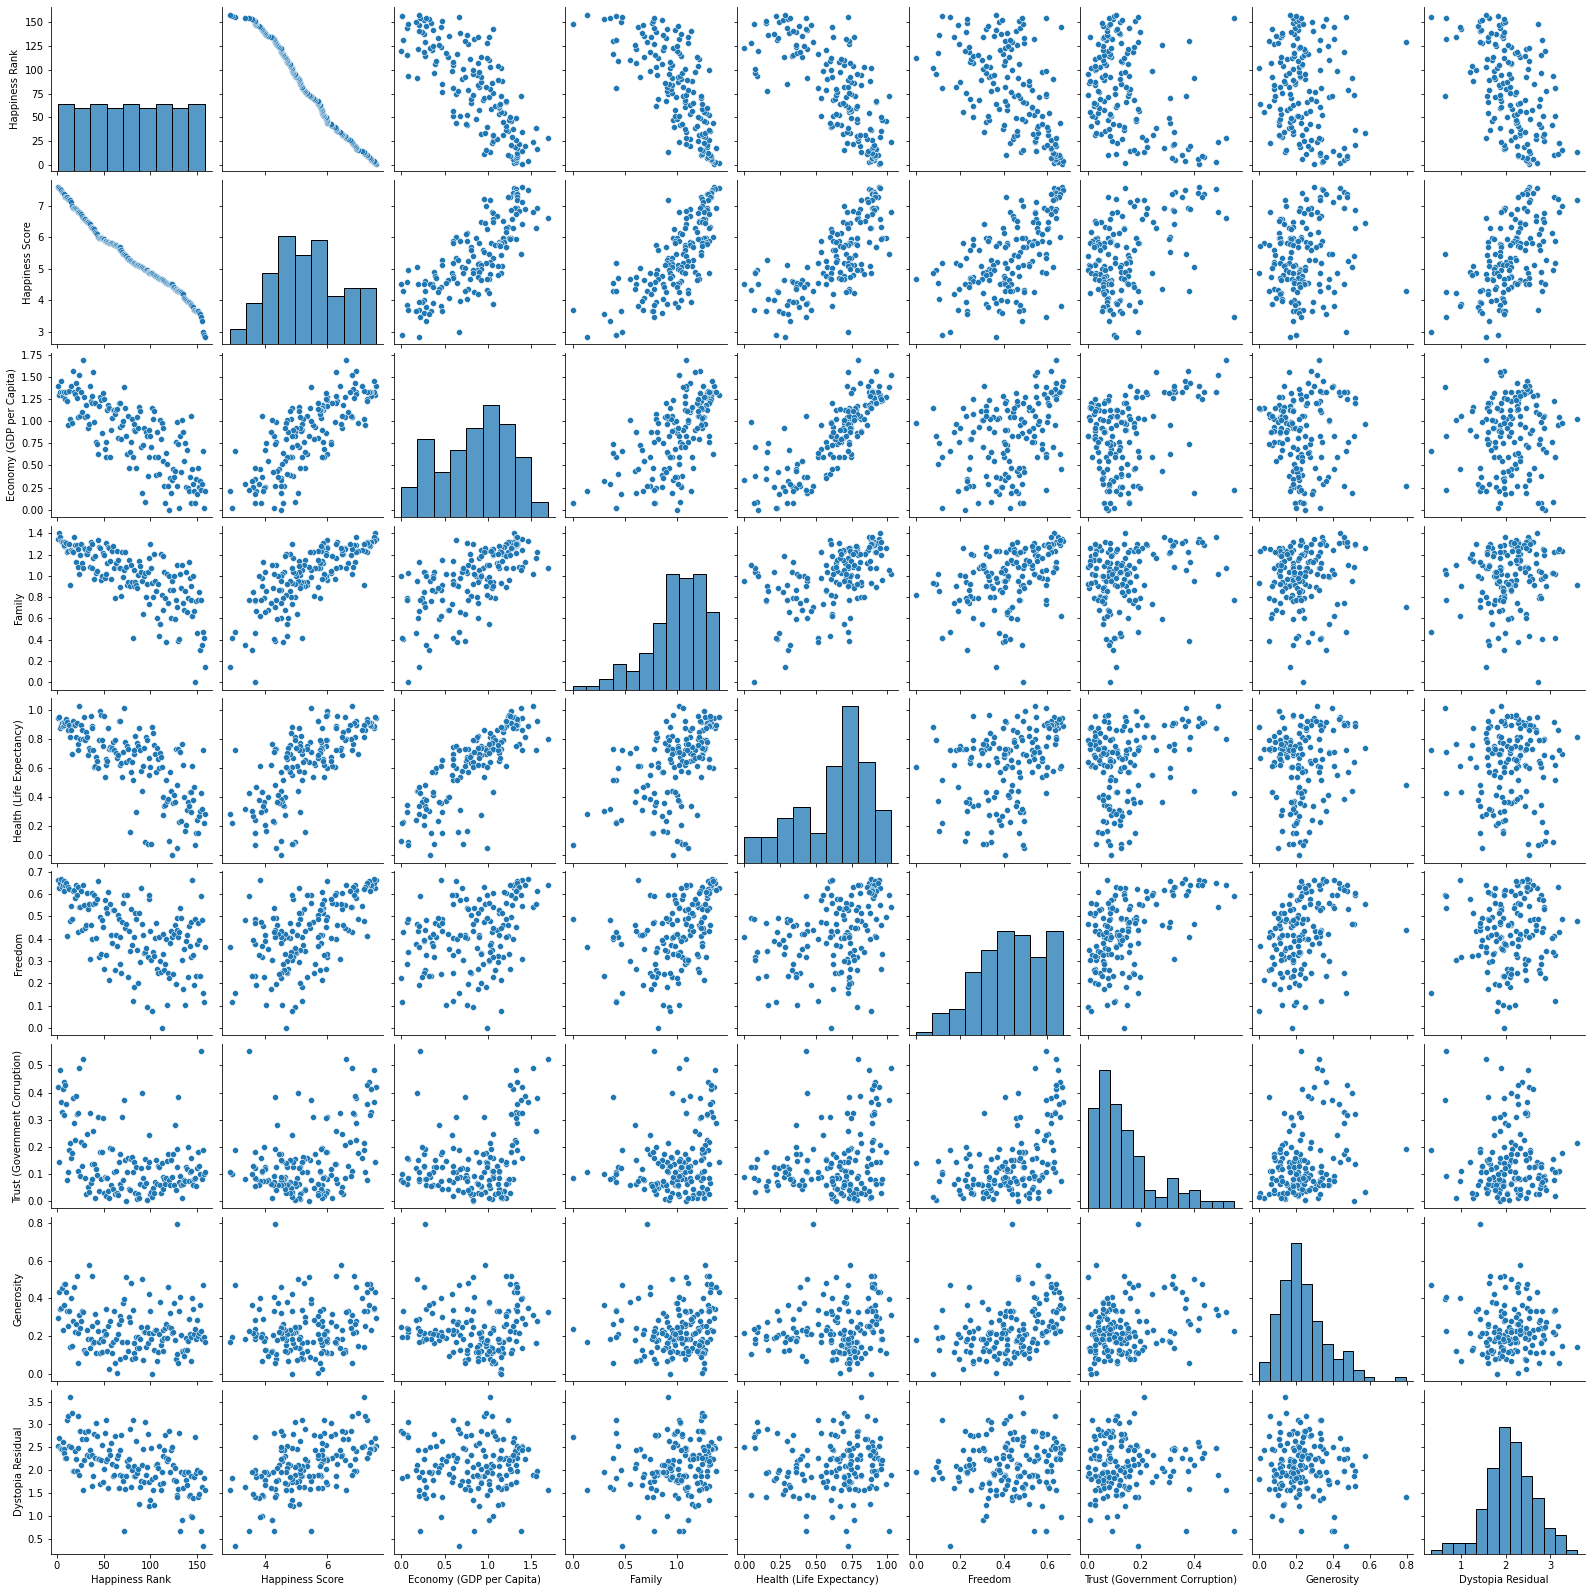

In [89]:
sns.pairplot(df)

We will drop Country, Region, Happiness Rank from the table since these features are not important for further processing.

In [90]:
df= df.drop(['Country','Region','Happiness Rank'], axis =1)

In [91]:
df.skew()

Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [92]:
columns =["Economy (GDP per Capita)","Family","Health (Life Expectancy)","Freedom","Trust (Government Corruption)","Generosity","Dystopia Residual"]
nrows=10
ncols=1

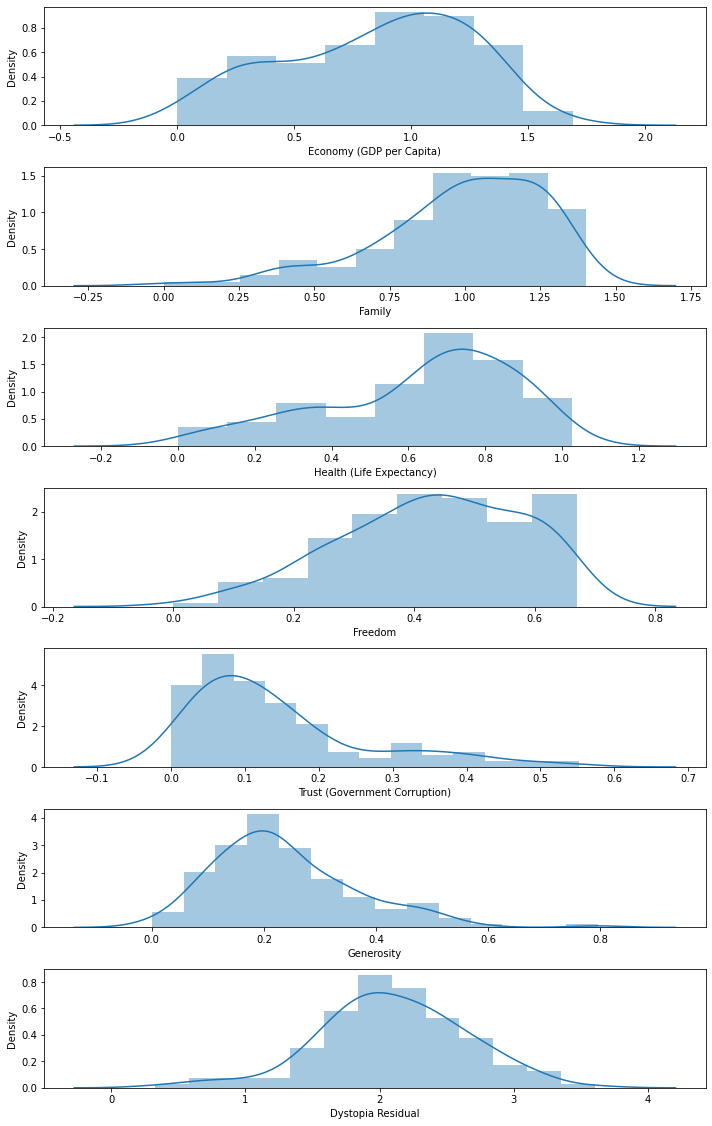

In [93]:
plt.figure(figsize=(10,22))
for i in range (0,len(columns)):
    plt.subplot(nrows,ncols,i+1)
    sns.distplot(df[columns[i]])
    plt.tight_layout()

We observed some skewness detection with distribution plot in Family ,Health ,Trust(Government corruption),Generosity.

# Checking Outliers

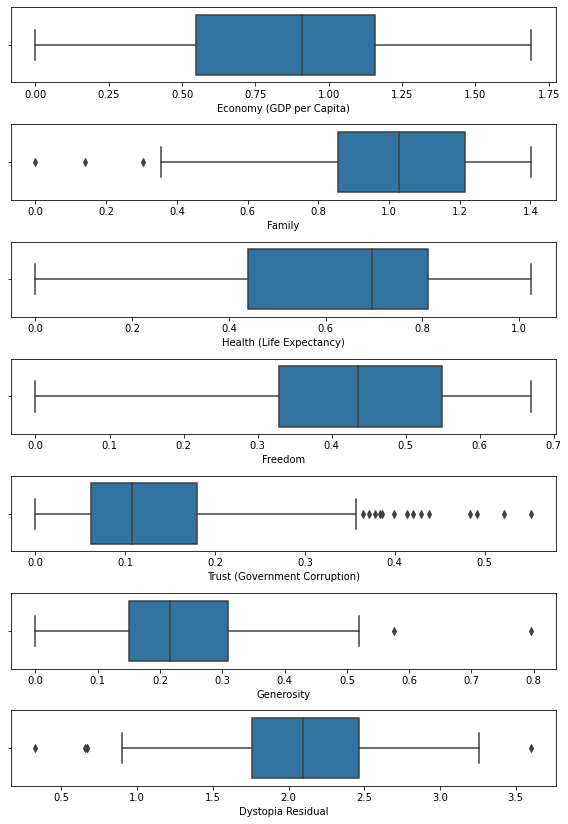

In [94]:
plt.figure(figsize=(8,16))
for i in range (0,len(columns)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(df[columns[i]])
    plt.tight_layout()

We observed outlier detection with boxplot in Trust(gov. corruption), Family,Generosity and Dystopia Residual. But we can observed this features with outlier detection.

# Removing Outliers

In [96]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [97]:
new_df.shape

(152, 8)

In [98]:
df.shape

(158, 8)

In [99]:
df=new_df

In [100]:
df.shape

(152, 8)

In [101]:
#Lets divide the new dataset into input and output datasets
x=df.drop(columns=['Happiness Score'])
y=df[['Happiness Score']]

# Removing Skewness

In [102]:
x.skew()

Economy (GDP per Capita)        -0.401110
Family                          -0.815356
Health (Life Expectancy)        -0.733453
Freedom                         -0.406211
Trust (Government Corruption)    1.287270
Generosity                       0.646579
Dystopia Residual               -0.045578
dtype: float64

we can see skewness in the dataset. We will remove the skewness using power_transform

In [103]:
from sklearn.preprocessing import power_transform
df_new = power_transform(x)

df_new= pd.DataFrame(df_new,columns=x.columns)

In [104]:
df_new.skew()

Economy (GDP per Capita)        -0.144167
Family                          -0.149268
Health (Life Expectancy)        -0.184207
Freedom                         -0.077878
Trust (Government Corruption)    0.179115
Generosity                       0.022444
Dystopia Residual                0.014422
dtype: float64

In [105]:
x=df_new

In [106]:
x.isnull().sum()

Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [107]:
df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [108]:
x.shape

(152, 7)

In [109]:
y.shape

(152, 1)

In [110]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test, pred)

    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ",maxAccu,"on Random_state ",maxRS)

Best Accuracy is  0.9967455788278662 on Random_state  126


# Now, splitting the data for Training & Testing

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [112]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(106, 7)
(46, 7)
(106, 1)
(46, 1)


In [113]:
LR=LinearRegression()
sv=SVR()
rf=RandomForestRegressor(n_estimators=100)
ada=AdaBoostRegressor(n_estimators=100)
knn=KNeighborsRegressor()
dtc=DecisionTreeRegressor()
ls=Lasso(alpha=0.001)
rd=Ridge(alpha=0.001)

In [114]:
model=[LR,sv,rf,ada,knn,dtc,ls,rd]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("The Mean absolute error value of ",m ,"is. ")
    print("Mean absolute error: %.2f" % mean_absolute_error(y_test,predm))
    print()
    print("The Mean squared error value of ",m ,"is. ")
    print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_test,predm))
    print()
    print("The r2_score value of ",m ,"is. ")
    print("R2-score of : %.2f" % r2_score(y_test,predm))
    print()
    print("Now check with Cross validation\n")
    
    score=cross_val_score(m,x,y,cv=5)
    print("The score after cross_validation : ",score)
    print("The Mean score after cross_validation : ",score.mean())
    print('\n')

The Mean absolute error value of  LinearRegression() is. 
Mean absolute error: 0.05

The Mean squared error value of  LinearRegression() is. 
Residual sum of squares (MSE): 0.00

The r2_score value of  LinearRegression() is. 
R2-score of : 1.00

Now check with Cross validation

The score after cross_validation :  [0.87716411 0.81937077 0.7862294  0.72068022 0.81981768]
The Mean score after cross_validation :  0.8046524369106327


The Mean absolute error value of  SVR() is. 
Mean absolute error: 0.15

The Mean squared error value of  SVR() is. 
Residual sum of squares (MSE): 0.04

The r2_score value of  SVR() is. 
R2-score of : 0.97

Now check with Cross validation

The score after cross_validation :  [-9.79748782  0.28686878  0.71600527 -0.04612623 -4.59440369]
The Mean score after cross_validation :  -2.6870287365045096


The Mean absolute error value of  RandomForestRegressor() is. 
Mean absolute error: 0.22

The Mean squared error value of  RandomForestRegressor() is. 
Residual sum 

# Hyper parameter tuning

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
#Lasso 
parameters=np.array([5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01,0.001, 0.0001, 0 ])
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=parameters),cv=5)

grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([5.e+00, 5.e-01, 5.e-02, 5.e-03, 5.e-04, 1.e+00, 1.e-01, 1.e-02,
       1.e-03, 1.e-04, 0.e+00])})

In [117]:
#Printing the best parameter found by GridSearchCV
grid.best_params_

{'alpha': 0.001}

In [118]:
mod=Lasso(alpha=0.001)

In [119]:
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(mod.score(x_train,y_train))

0.9930458496614105


In [120]:
mod.coef_

array([0.39589903, 0.24522914, 0.24843824, 0.15224942, 0.0707978 ,
       0.10312552, 0.51052783])

# Saving the model

In [121]:
#saving the model
model=joblib.dump(mod,'lassomodel.obj')